In [109]:
from pandas import read_csv, isna, to_datetime, merge, concat
import numpy as np 
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error


In [110]:
dataframes = []
dataframes.append(read_csv("data/atp_matches_2021.csv"))
dataframes.append(read_csv("data/atp_matches_2022.csv"))
dataframes.append(read_csv("data/atp_matches_2023.csv"))
dataframes.append(read_csv("data/atp_matches_2024.csv"))



# Data cleaning

In [111]:
# remove NaNs
for df in dataframes:
    df["w_1stIn"].fillna((df["w_1stIn"].mean()), inplace=True)
    df["l_1stIn"].fillna((df["l_1stIn"].mean()), inplace=True)


/tmp/ipykernel_7829/98200603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["w_1stIn"].fillna((df["w_1stIn"].mean()), inplace=True)
/tmp/ipykernel_7829/98200603.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [112]:
# split date into year, month, day
for df in dataframes:
    for idx, el in enumerate(df["tourney_date"]):
        df.loc[idx, "year"] = int(str(el)[:4])
        df.loc[idx, "month"] = int(str(el)[4:6])
        df.loc[idx, "day"] = int(str(el)[6:8])
    df['date'] = to_datetime(df[['year', 'month', 'day']])
    df = df.drop("tourney_date", axis=1)
    df = df.drop("month", axis=1)
    df = df.drop("day", axis=1)


data = concat(dataframes, axis=0)
data = data.sort_values(by="date", axis=0)


# Data analysis

### Jannik Sinner

In [113]:
# filter matches to select only those with desired player
data_w = data.loc[data["winner_name"] == "Jannik Sinner"]
data_l = data.loc[data["loser_name"] == "Jannik Sinner"]

data_sinner = concat([data_w], axis=0)
print(data_sinner)

print("Number of entries:", data_sinner.shape[0])

     tourney_id           tourney_name surface  draw_size tourney_level  \
2295  2021-8998  Great Ocean Road Open    Hard         64             A   
2269  2021-8998  Great Ocean Road Open    Hard         64             A   
2293  2021-8998  Great Ocean Road Open    Hard         64             A   
2290  2021-8998  Great Ocean Road Open    Hard         64             A   
2283  2021-8998  Great Ocean Road Open    Hard         64             A   
...         ...                    ...     ...        ...           ...   
908   2024-0410    Monte Carlo Masters    Clay         64             M   
916   2024-0410    Monte Carlo Masters    Clay         64             M   
1073  2024-1536         Madrid Masters    Clay        128             M   
1065  2024-1536         Madrid Masters    Clay        128             M   
1089  2024-1536         Madrid Masters    Clay        128             M   

      tourney_date  match_num  winner_id winner_seed winner_entry  ...  \
2295      20210201       

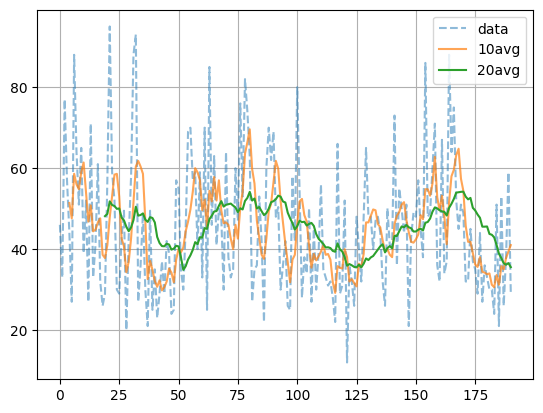

In [114]:
'''yvals = list(data_w["w_1stIn"])
yvals = yvals + list(data_l["l_1stIn"])

xvals = list(data_w.index) 
xvals = xvals + list(data_l.index)
zvals = list(data_w["w_svpt"])
zvals = zvals + list(data_l["l_svpt"])

vals = [(x,y,z) for x,y,z in zip (xvals, yvals, zvals)]
vals = sorted(vals, key=lambda x: x[0])
xvals = range(len(vals))
yvals = np.array([v[1]/v[2]*100 for v in vals])
yvals[np.isnan(yvals)] = np.nanmean(yvals)'''

xvals = range(data_sinner.shape[0])
yvals = data_sinner["w_1stIn"]

plt.plot(xvals, yvals, '--', alpha=0.5, label='data')

window = 5
moving_avg = np.convolve(yvals, np.ones(window)/window, mode='valid')

plt.plot(xvals[window-1:], moving_avg,  alpha=0.7, label='10avg')

window = 20
moving_avg = np.convolve(yvals, np.ones(window)/window, mode='valid')

plt.plot(xvals[window-1:], moving_avg, label='20avg')

plt.grid()
plt.legend()
plt.show()